# Clustering 

In [3]:
import pandas as pd
import numpy as np
# allow plots to appear in the notebook
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

Expecting a plot of `epsilon` vs `sil_score`.

In [8]:
road = pd.read_csv('3D_spatial_network.txt.gz', header = None, names = ['osm', 'lat','lon','alt'])
road = road.drop(['osm'], axis = 1).sample(1000)

road_copy = road.copy()
road_copy.head()

,lat,lon,alt
270756,9.917378,56.995918,38.613726
198269,9.807895,56.992995,24.196921
86457,9.378330,56.910100,34.261350
386359,9.968161,57.474289,30.495468
293157,10.312635,56.732293,1.966028


In [9]:
road_copy['alt'] = (road.alt - road.alt.mean())/road.alt.std()
road_copy['lat'] = (road.lat - road.lat.mean())/road.lat.std()
road_copy['lon'] = (road.lon - road.lon.mean())/road.lon.std()
road_copy.head()

,lat,lon,alt
270756,0.291729,-0.334724,0.882760
198269,0.118335,-0.344788,0.110985
86457,-0.561992,-0.630238,0.649764
386359,0.372157,1.312548,0.448165
293157,0.917721,-1.242515,-1.079101


In [10]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [75]:
min_samples = [1,2,3,4,5,6,7,8,9,10]
epsilons = np.arange(0.05, 0.51, 0.01)
all_scores = []

for min_sample in min_samples:
    scores = []
    for epsilon in epsilons:
        dbscan = DBSCAN(eps = epsilon, min_samples = min_sample)
        labels = dbscan.fit_predict(road_copy[['lon', 'lat', 'alt']])
        
        # calculate silouette score here
        try:
            score = metrics.silhouette_score(road_copy[['lon', 'lat', 'alt']], labels)
        
        except ValueError:
            pass
        
        scores.append(score)
        
    all_scores.append(scores)

In [76]:
all_scores

[[0.13387123016014116,
  0.1625069998455823,
  0.19038223167097845,
  0.2118936141029642,
  0.21924387199640377,
  0.21360680112449176,
  0.2331374072581589,
  0.25524062612972,
  0.25034852497185495,
  0.24758761567002183,
  0.24161649580530342,
  0.24092194582705082,
  0.1333034984934344,
  0.09680342177177163,
  0.02312742140075062,
  -0.012377899480498573,
  -0.04351016801728015,
  -0.039985427031349226,
  -0.048120574350285085,
  -0.1288082807943136,
  -0.2386687267204733,
  -0.23903513322886283,
  -0.28309696356850395,
  -0.3441236753542055,
  -0.3432575377165581,
  -0.39072495912131594,
  -0.42242531462274957,
  -0.4343046395932248,
  -0.42953732654906535,
  -0.4279036329469519,
  -0.3777765735937727,
  -0.39184263283923093,
  -0.3722182810927744,
  -0.3830564514202255,
  -0.3813936381832984,
  -0.38874201568608746,
  -0.35496346775588516,
  -0.3473244185667267,
  -0.3204522882222417,
  -0.3194604946043569,
  -0.30943856249208973,
  -0.33298059700863325,
  -0.33351997771341724,


<IPython.core.display.Javascript object>


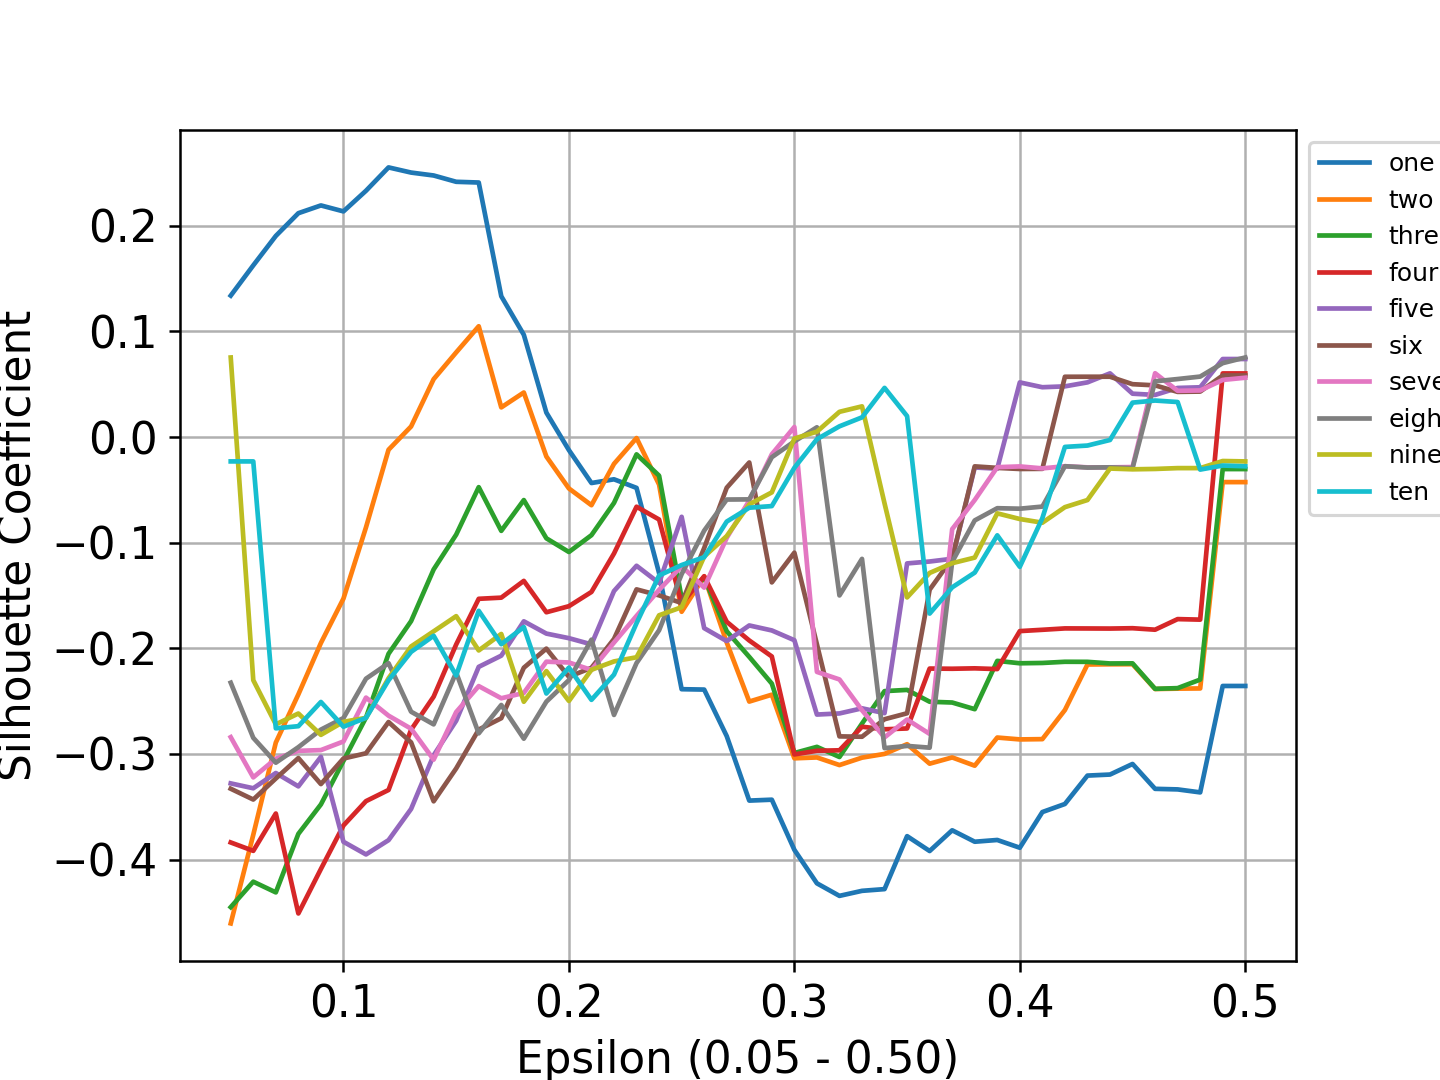

In [78]:
sc_df = pd.DataFrame(all_scores, columns = epsilons).T
sc_df.columns = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten"]

plt.figure()
plt.plot(sc_df["one"])
plt.plot(sc_df["two"])
plt.plot(sc_df["three"])
plt.plot(sc_df["four"])
plt.plot(sc_df["five"])
plt.plot(sc_df["six"])
plt.plot(sc_df["seven"])
plt.plot(sc_df["eight"])
plt.plot(sc_df["nine"])
plt.plot(sc_df["ten"])
plt.legend(sc_df, bbox_to_anchor=(1, 1), loc='upper left', fontsize = "8")
plt.xlabel('Epsilon (0.05 - 0.50)')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data (repeat the above). If your data is labeled with a class that you are attempting to predict, be sure to not use it in training and clustering. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D or 3D plots. 

As a bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot (like in 1.)
- Plots of the clustered data

In [50]:
univ = pd.read_csv('university_rankings.csv')
univ.dropna(inplace = True)

univ_copy = univ.copy()
univ_copy.head()

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


In [51]:
non_numeric_columns = ['university', 'link', 'logo'] 
transform_columns = ['country', 'city', 'region', 'type', 'research_output', 'size']

In [52]:
from sklearn import preprocessing

enc = preprocessing.OrdinalEncoder()

In [53]:
univ[transform_columns] = enc.fit_transform(univ[transform_columns])
univ = univ.drop(non_numeric_columns, axis = 1)

univ['international_students'] = univ['international_students'].str.replace(',', '').astype(float)
univ['faculty_count'] = univ['faculty_count'].str.replace(',', '').astype(float)

univ.head()

,year,rank_display,score,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,2017,1,100.0,59.0,64.0,4.0,0.0,3.0,4.0,3730.0,1.0,3065.0
1,2017,2,98.7,59.0,336.0,4.0,0.0,3.0,3.0,3879.0,0.0,4725.0
2,2017,3,98.3,59.0,64.0,4.0,0.0,3.0,5.0,5877.0,0.0,4646.0
3,2017,4,97.2,58.0,64.0,2.0,1.0,4.0,4.0,7925.0,0.0,5800.0
4,2017,5,96.9,59.0,283.0,4.0,0.0,3.0,2.0,692.0,2.0,968.0


In [54]:
univ_copy[transform_columns] = enc.fit_transform(univ[transform_columns])
univ_copy = univ_copy.drop(non_numeric_columns, axis = 1)

univ_copy['international_students'] = univ_copy['international_students'].str.replace(',', '').astype(float)
univ_copy['faculty_count'] = univ_copy['faculty_count'].str.replace(',', '').astype(float)

univ_copy.head()

,year,rank_display,score,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,2017,1,100.0,59.0,64.0,4.0,0.0,3.0,4.0,3730.0,1.0,3065.0
1,2017,2,98.7,59.0,336.0,4.0,0.0,3.0,3.0,3879.0,0.0,4725.0
2,2017,3,98.3,59.0,64.0,4.0,0.0,3.0,5.0,5877.0,0.0,4646.0
3,2017,4,97.2,58.0,64.0,2.0,1.0,4.0,4.0,7925.0,0.0,5800.0
4,2017,5,96.9,59.0,283.0,4.0,0.0,3.0,2.0,692.0,2.0,968.0


In [55]:
univ_copy['score'] = (univ.score - univ.score.mean())/univ.score.std()
univ_copy['research_output'] = (univ.research_output - univ.research_output.mean())/univ.research_output.std()
univ_copy['student_faculty_ratio'] = (univ.student_faculty_ratio - univ.student_faculty_ratio.mean())/univ.student_faculty_ratio.std()

In [79]:
min_samples = [1,2,3,4,5,6,7,8,9,10]
epsilons = np.arange(0.05, 0.51, 0.01)
new_scores = []

for min_sample in min_samples:
    scores = []
    for epsilon in epsilons:
        dbscan = DBSCAN(eps = epsilon, min_samples = min_sample)
        labels = dbscan.fit_predict(univ_copy[['score', 'research_output', 'student_faculty_ratio']])
        
        # calculate silouette score here
        try:
            score = metrics.silhouette_score(univ_copy[['score', 'research_output', 'student_faculty_ratio']], labels)
        
        except ValueError:
            pass
        
        scores.append(score)
        
    new_scores.append(scores)

In [47]:
new_scores

[[0.30522827687776144,
  0.30522827687776144,
  0.30522827687776144,
  0.30522827687776144,
  0.30522827687776144,
  0.33531102539202445,
  0.4423829510531793,
  0.4423829510531793,
  0.4423829510531793,
  0.4423829510531793,
  0.4423829510531793,
  0.4423829510531793,
  0.4423829510531793,
  0.4423829510531793,
  0.4423829510531793,
  0.4673933379208709,
  0.4908973062825578,
  0.4908973062825578,
  0.4908973062825578,
  0.4908973062825578,
  0.4908973062825578,
  0.4908973062825578,
  0.4908973062825578,
  0.4908973062825578,
  0.4908973062825578,
  0.49455257664233,
  0.41900044688187016,
  0.41900044688187016,
  0.41900044688187016,
  0.41900044688187016,
  0.41900044688187016,
  0.41900044688187016,
  0.41900044688187016,
  0.41900044688187016,
  0.41900044688187016,
  0.3658058629769013,
  0.33860358967502824,
  0.33860358967502824,
  0.33860358967502824,
  0.33860358967502824,
  0.33860358967502824,
  0.33860358967502824,
  0.33860358967502824,
  0.33860358967502824,
  0.3386035

<IPython.core.display.Javascript object>


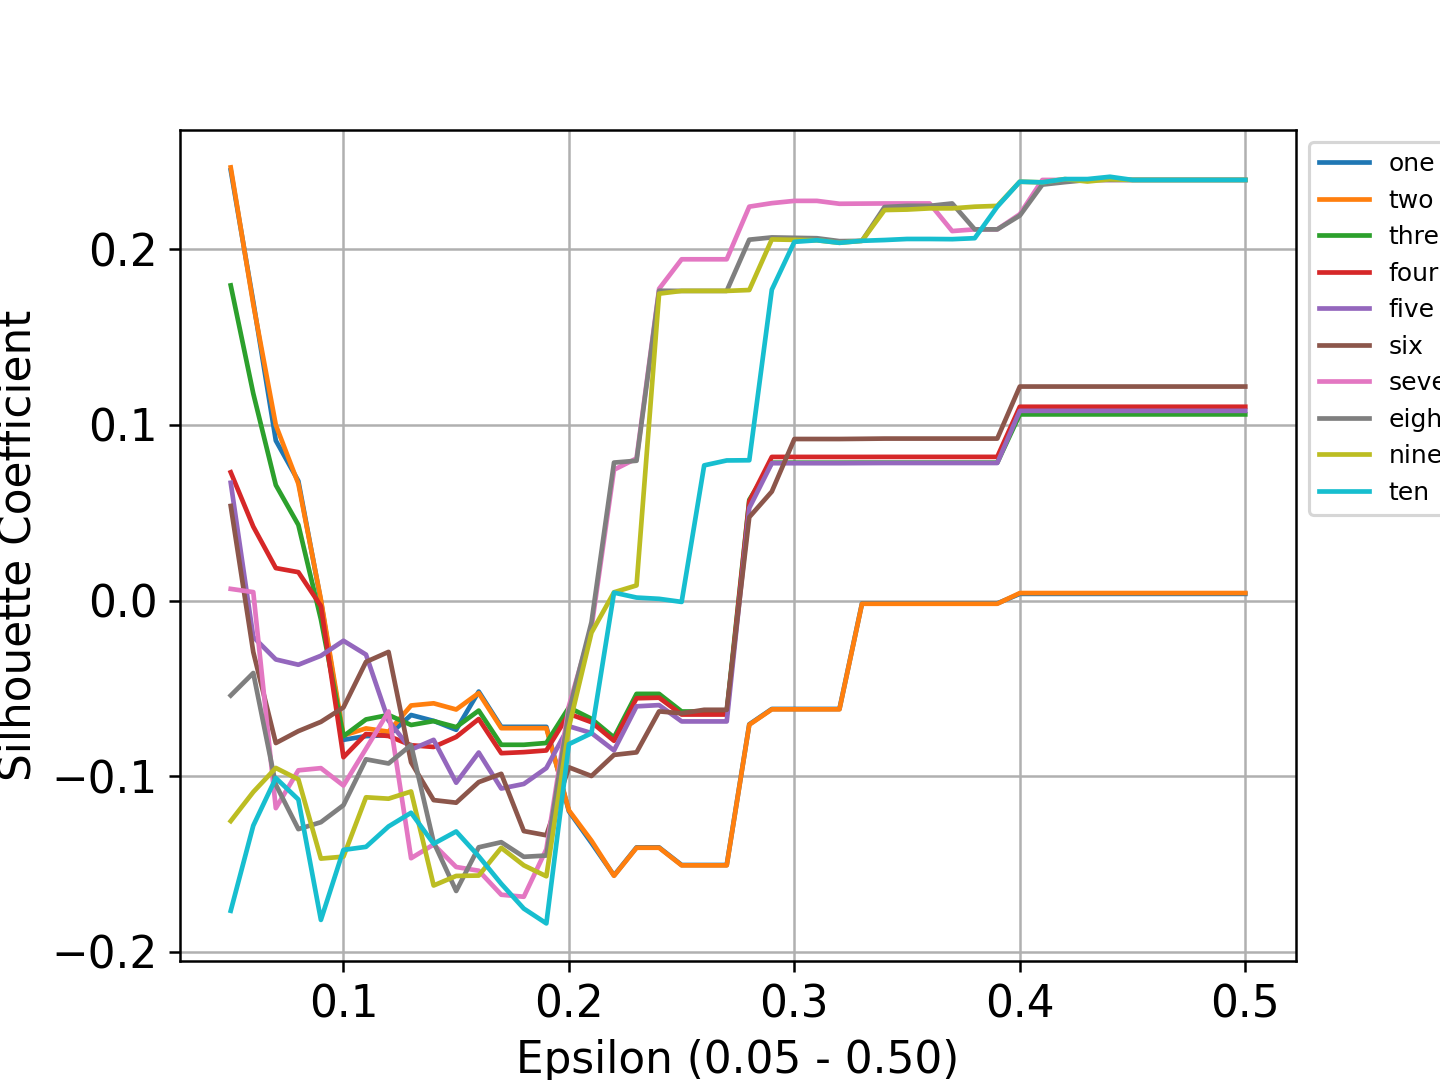

In [83]:
univsc_df = pd.DataFrame(new_scores, columns = epsilons).T
univsc_df.columns = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten"]

plt.figure()
plt.plot(univsc_df["one"])
plt.plot(univsc_df["two"])
plt.plot(univsc_df["three"])
plt.plot(univsc_df["four"])
plt.plot(univsc_df["five"])
plt.plot(univsc_df["six"])
plt.plot(univsc_df["seven"])
plt.plot(univsc_df["eight"])
plt.plot(univsc_df["nine"])
plt.plot(univsc_df["ten"])
plt.legend(univsc_df, bbox_to_anchor=(1, 1), loc='upper left', fontsize = "8")
plt.xlabel('Epsilon (0.05 - 0.50)')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

In [ ]:
# Looking at the char above, clusters with epsilon values of below 0.1 and above 0.3 appeared to perform best. Clusters 10, 7, 
# 9, and 6 appear to have silhouette coefficients closest to 1 when their epsilon value is 0.3 or higher. Interestingly, all 
# clusters appear to do poorly with an epsilon value between 0.1 and 0.2. 

In [57]:
# interested to see what the kmeans results look like in comparison

from sklearn.cluster import KMeans

N = 7
km = KMeans(n_clusters = N, random_state = 1)
univ_copy['cluster'] = km.fit_predict(univ_copy[['score', 'research_output', 'student_faculty_ratio']])

<IPython.core.display.Javascript object>


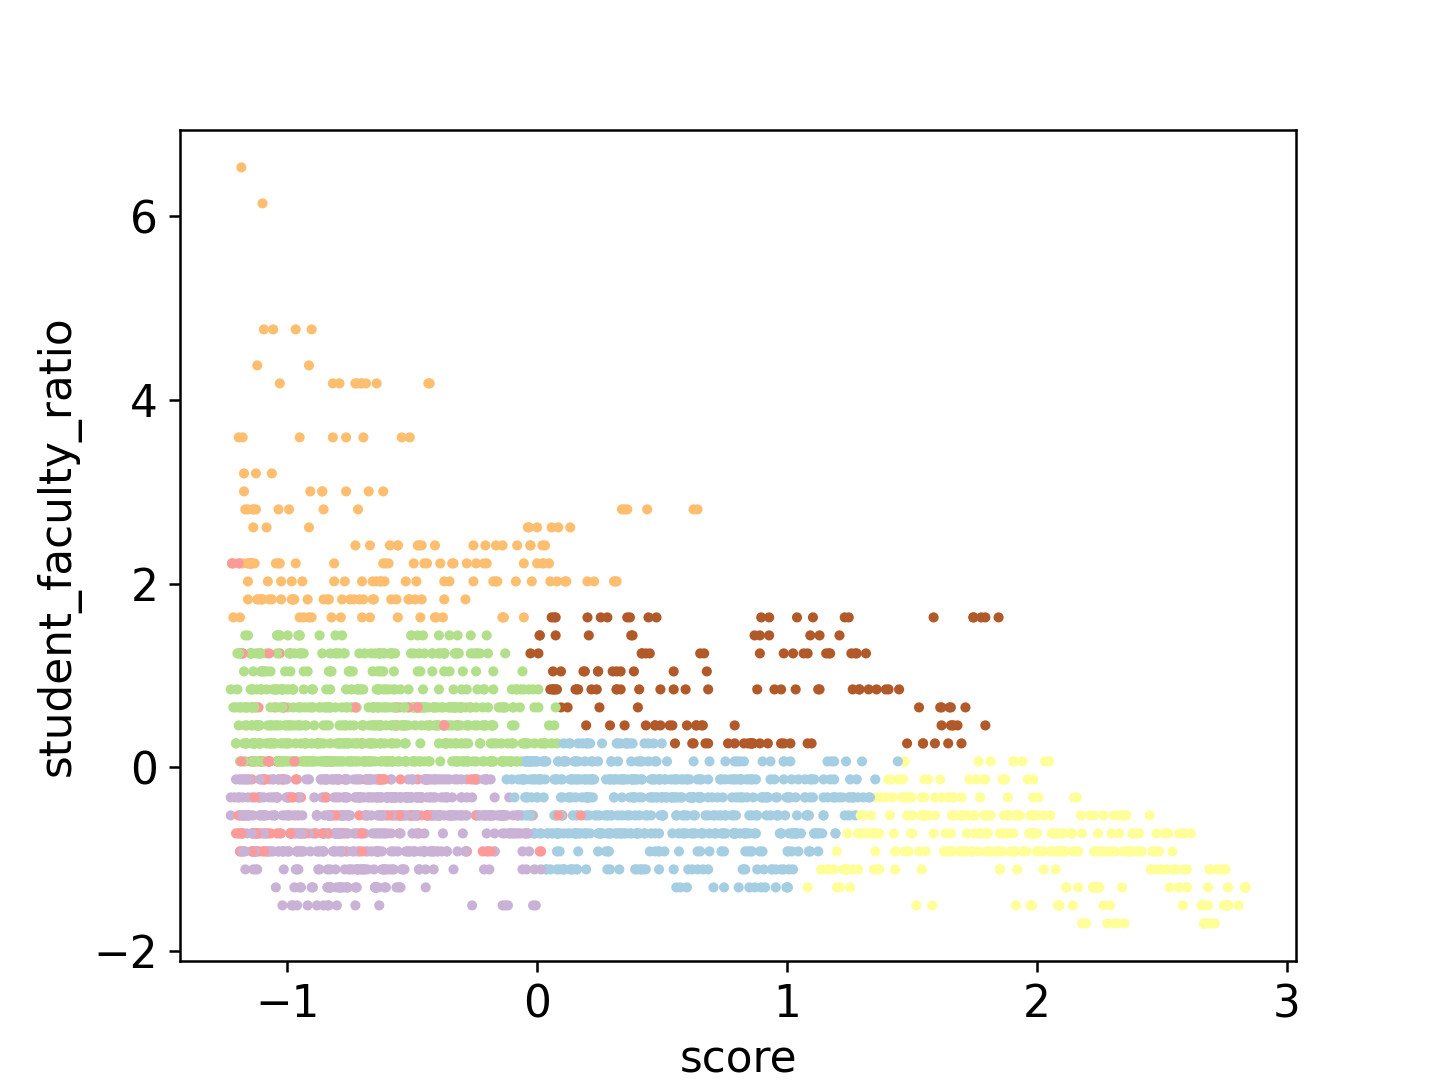

In [59]:
fig = plt.figure()
plt.scatter(univ_copy.score, univ_copy.student_faculty_ratio, c = univ_copy.cluster, s = 5, cmap = 'Paired')

plt.xlabel('score')
plt.ylabel('student_faculty_ratio')
plt.show()

<IPython.core.display.Javascript object>


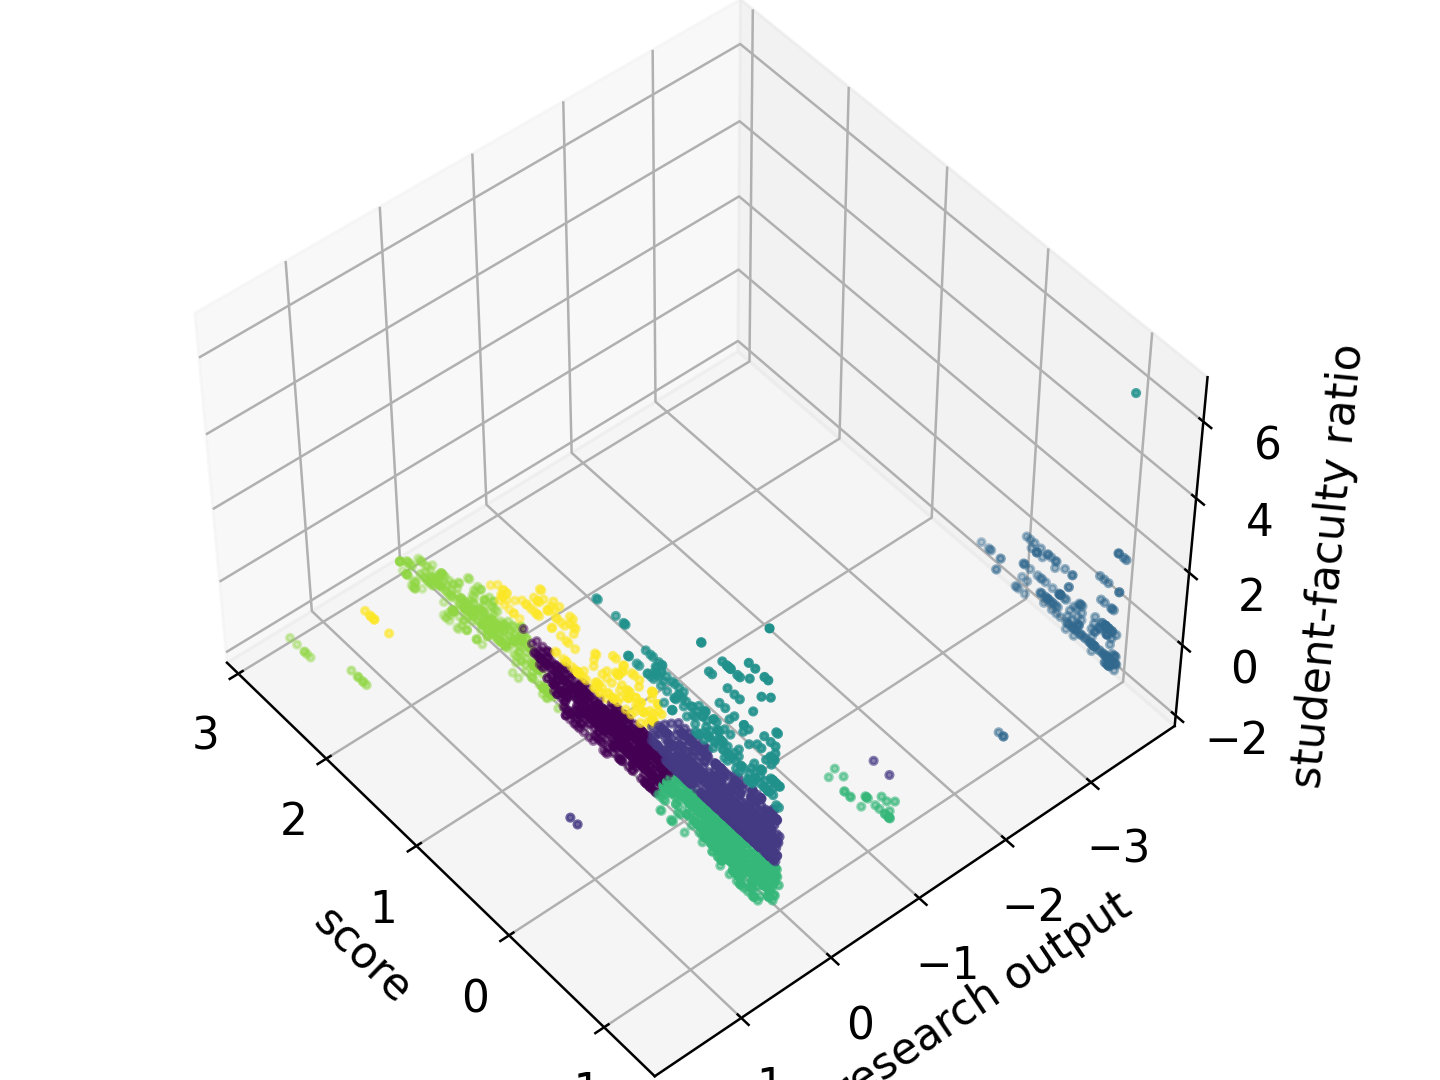

In [63]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect = [0, 0, .95, 1], elev = 48, azim = 140)

plt.cla()

ax.scatter(univ_copy['score'], univ_copy['research_output'], univ_copy['student_faculty_ratio'], c = univ_copy.cluster, s = 5)

ax.set_xlabel('score')
ax.set_ylabel('research output')
ax.set_zlabel('student-faculty ratio')
plt.show()